In [1]:
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y=make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=3)

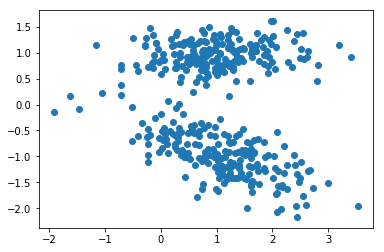

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
#broadcasting
Y[Y==0]=-1

In [6]:
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

In [7]:
import numpy as np

In [8]:
class SVM():
    def __init__(self,C=1):
        self.b=0
        self.w=0
        self.c=C
        
    def getloss(self,w,Y,X,b):
        loss=0
        m=X.shape[0]
        loss+=0.5*np.dot(w,(w.T))
        for i in range(m):
            ti=Y[i]*(np.dot(w,X[i].T) +b)
            loss+=self.c * max(0,1-ti)
        return loss[0][0]
    def fit(self,X,Y,max_itr=100,learning_rate=0.001,batch_size=100):
        c=self.c
        n=X.shape[1]
        w=np.zeros((1,n))
        b=0
        losses=[]
        m=X.shape[0]
        for k in range(max_itr):
            losses.append(self.getloss(w,Y,X,b))
            ids=np.arange(m)
            np.random.shuffle(ids)
            for batch_start in range(0,m,batch_size):
                grad_b=0
                grad_w=0
                for i in range(batch_start,batch_size+batch_start):                
                    ti=Y[i]*(np.dot(w ,X[i].T)+b)
                    if(ti>=1):
                        grad_b+=0
                        grad_w+=0
                    if(ti<1):
                        grad_b+=learning_rate*c*Y[i]
                        grad_w+=learning_rate*c*Y[i]*X[i]
                
                w=w-learning_rate*w+grad_w
                b=b+grad_b
        self.w=w
        self.b=b
        return w[0],b,losses   
            
            
            
        

In [9]:
mySVM=SVM(C=1000)

In [10]:
W,B,loss=mySVM.fit(X,Y,max_itr=100)
print(loss[0])
print(loss[-1])

400000.0
18692.411320153962


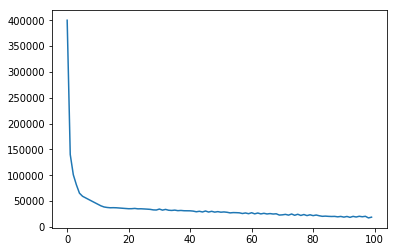

In [11]:
plt.plot(loss)

In [12]:
print(W,B)

[-13.22468873 -36.94022799] 5.0


In [13]:
def plot_hyperplane(W,B):
    plt.figure(figsize=(12,12))
    x=np.linspace(-2,4,10)
    y=-(W[0]*x+B)/W[1]
    plt.plot(x,y,c='red')
    y=-(W[0]*x+B+1)/W[1]
    plt.plot(x,y,c='green')
    y=-(W[0]*x+B-1)/W[1]
    plt.plot(x,y,c='yellow')
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()


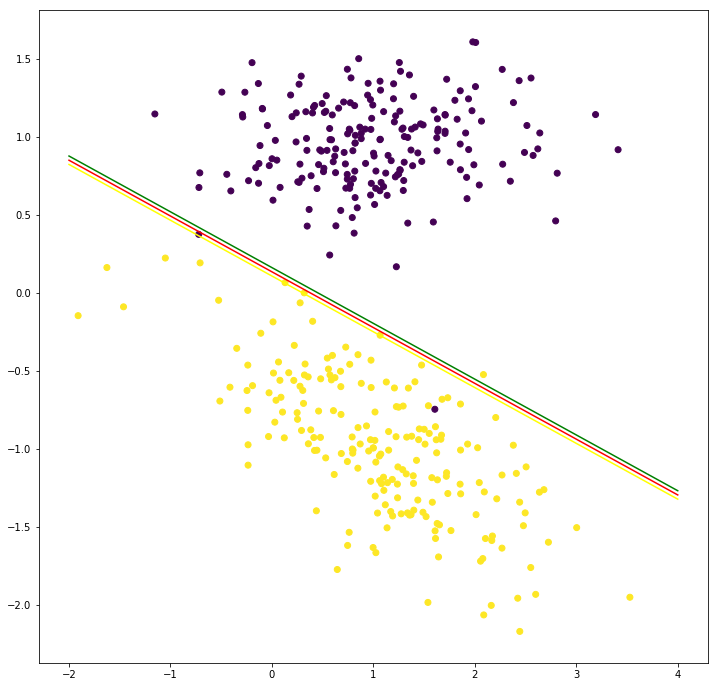

In [14]:
plot_hyperplane(W,B)

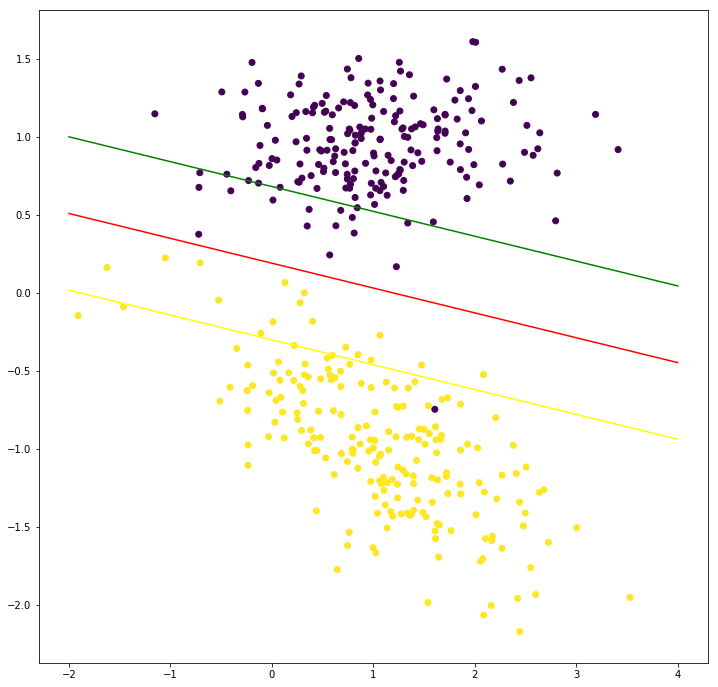

In [15]:
mySVM=SVM(C=1)
W,B,loss=mySVM.fit(X,Y,max_itr=100)
plot_hyperplane(W,B)